<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-объявлений-о-продаже-квартир" data-toc-modified-id="Исследование-объявлений-о-продаже-квартир-1">Исследование объявлений о продаже квартир</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1.1">Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.1">Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.1">Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-1.3">Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3.1">Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.4">Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-1.5">Общий вывод</a></span></li></ul></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


**Описание данных**:

	• airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
	• balcony — число балконов
	• ceiling_height — высота потолков (м)
	• cityCenters_nearest — расстояние до центра города (м)
	• days_exposition — сколько дней было размещено объявление (от публикации до снятия)
	• first_day_exposition — дата публикации
	• floor — этаж
	• floors_total — всего этажей в доме
	• is_apartment — апартаменты (булев тип)
	• kitchen_area — площадь кухни в квадратных метрах (м²)
	• last_price — цена на момент снятия с публикации
	• living_area — жилая площадь в квадратных метрах (м²)
	• locality_name — название населённого пункта
	• open_plan — свободная планировка (булев тип)
	• parks_around3000 — число парков в радиусе 3 км
	• parks_nearest — расстояние до ближайшего парка (м)
	• ponds_around3000 — число водоёмов в радиусе 3 км
	• ponds_nearest — расстояние до ближайшего водоёма (м)
	• rooms — число комнат
	• studio — квартира-студия (булев тип)
	• total_area — площадь квартиры в квадратных метрах (м²)
	• total_images — число фотографий квартиры в объявлении


## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/real_estate_data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

В представленном для анализа Датафрейме 23699 значений, 22 столбца c данными категориального, количественного и логического типа. 


- Пропуски присутствуют в 14 столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition;


- Названия столбцов "cityCenters_nearest", "parks_around3000", "ponds_around3000" заполнено  с нарушением стиля;


- Неверно определен тип данных float64 в столбцах floors_total, last_price, balcony,  parks_around3000,	ponds_around3000,	days_exposition должен быть int64. Также в столбце first_day_exposition находится дата, а тип данных определился как object.




## Предобработка данных

Начну с самого простого - приведу в порядок названия столбцов, чтобы дальше было удобно обрабатывать данные:

In [5]:
df = df.rename(columns = {
    'cityCenters_nearest':'city_сenters_nearest',
    'parks_around3000':'parks_around_3000',
    'ponds_around3000':'ponds_around_3000',
})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В столбцах 'floors_total' и 'locality_name' наименьшее число пропусков - 86 и 49. Кол-во этажей и населенный пункт скорее всего были не указаны, больше похоже на человеческий фактор, так как Nan немного. Восстановить эти данные будет достаточно проблематично, поэтому стоит их удалить методом dropna(), чтобы не искажать статистику и совершать дальнейший анализ со столбцами.

In [6]:
df.dropna(subset = ['floors_total', 'locality_name'], inplace = True)

Далее обработаем пропуски в столбце с количеством балконов, заменим все пропуски на 0. Т.к. скорее всего люди ничего не указывали в данной строке по причине отсутствия балкона.

Также поступим и со столбцами с числом парков и водоемов в радиусе 3 км. Здесь данные вносились автоматически и скорее всего не были определены из-за отсутсвия информации, которая заполнялась человеком.

Плюс сразу поправим типы данных в столбцах balcony, floors_total, parks_around_3000, ponds_around_3000 на тип int64. 

In [7]:
columns_wrong_type = ['balcony', 'floors_total', 'parks_around_3000', 'ponds_around_3000']

for column in columns_wrong_type:
    df[column] = df[column].fillna(0).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  int32  
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  int32  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

В столбце is_apartment 20924 пропуска. В процессе работы над проектом этот столбец нам не понадобится, поэтому его можно удалить:

In [8]:
df.drop(['is_apartment'], axis='columns', inplace=True)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name',
       'airports_nearest', 'city_сenters_nearest', 'parks_around_3000',
       'parks_nearest', 'ponds_around_3000', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

Для того чтобы понять, как лучше заполнить пропуски в столбце ceiling_height, используем методы unique() и describe():

In [9]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [10]:
df['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В данных с высотой потолков есть значительные выбросы, например, 100 м., 32 м. или 26 м. В описании проекта указана информация именно о квартирах, но даже если учесть особняки, то очень вряд ли там настолько высокие потолки. Можно предположить, что это человеческий фактор - ошибки при наборе с клавиатуры. Чтобы эти выбросы не искажали статистику, необходимо их удалить:

In [11]:
df.drop(df[df.ceiling_height > 4.15].index, inplace=True)
df.drop(df[df.ceiling_height < 2.00].index, inplace=True) # удалим потолки более 4.15 метров и менее 2 метров
df.reset_index(inplace=True) # Обновляю индексы
df['ceiling_height'].describe() # снова проверим описание данных в столбце

count    14409.000000
mean         2.721282
std          0.259417
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.150000
Name: ceiling_height, dtype: float64

Теперь стандартное отклонение минимально, выбросов нет. Можно заполнить пропущенные значения по медиане:

In [12]:
df.ceiling_height.fillna(df['ceiling_height'].median(), inplace=True)

Также для анализа нам необходима жилая площадь, проверим данные столбца living_area на выбросы:

In [13]:
df['living_area'].describe()

count    21632.0000
mean        34.3502
std         21.6643
min          2.0000
25%         18.6000
50%         30.0000
75%         42.2000
max        409.7000
Name: living_area, dtype: float64

In [14]:
# код ревьюера
print(len(df))
print(len(df[df['living_area'] < 20]))

23493
6198


In [15]:
df.living_area.isna().sum()

1861

In [16]:
for room in df['rooms'].unique():
    median = df.loc[df['rooms'] == room, 'living_area'].median()
    df.loc[(df['living_area'].isna()) & (df['rooms'] == room),'living_area'] = median
df.living_area.isna().sum()

0

In [17]:
for rooms in df['rooms'].unique():
    median = df.loc[df['rooms'] == rooms, 'kitchen_area'].median()
    print(f'Комнат:{rooms}, медиана:{median}')
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == rooms),'kitchen_area'] = median
print(f'Пропуски в столбце площадь кухни: {df.kitchen_area.isna().sum()}')

Комнат:3, медиана:9.5
Комнат:1, медиана:9.004999999999999
Комнат:2, медиана:8.7
Комнат:4, медиана:11.05
Комнат:5, медиана:15.0
Комнат:6, медиана:19.5
Комнат:0, медиана:nan
Комнат:7, медиана:19.75
Комнат:11, медиана:12.600000000000001
Комнат:8, медиана:25.0
Комнат:14, медиана:21.25
Комнат:10, медиана:19.8
Комнат:15, медиана:100.0
Комнат:9, медиана:14.3
Комнат:19, медиана:27.6
Комнат:16, медиана:13.0
Комнат:12, медиана:112.0
Пропуски в столбце площадь кухни: 192


Еще у нас остался столбец с датой, тип которого определился, как object. Исправим это:

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT%H:%M:%S')
df

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,...,9.50,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23488,23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23489,23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23490,23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,...,8.70,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23491,23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23493 entries, 0 to 23492
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23493 non-null  int64         
 1   total_images          23493 non-null  int64         
 2   last_price            23493 non-null  float64       
 3   total_area            23493 non-null  float64       
 4   first_day_exposition  23493 non-null  datetime64[ns]
 5   rooms                 23493 non-null  int64         
 6   ceiling_height        23493 non-null  float64       
 7   floors_total          23493 non-null  int32         
 8   living_area           23493 non-null  float64       
 9   floor                 23493 non-null  int64         
 10  studio                23493 non-null  bool          
 11  open_plan             23493 non-null  bool          
 12  kitchen_area          23301 non-null  float64       
 13  balcony         

### Вывод

Все выявленные аномалии в данных были обработаны, пропуски заполнены, логика заполнения по каждому описана.

В оставшихся столбцах: airports_nearest , city_сenters_nearest , parks_nearest , ponds_nearest , days_exposition - обрабатывать пропущенные значения не будем, оставим Nan, чтобы не исказить статистики и в будущем иметь возможность работать с ними как с числовыми столбцами. Для этих столбцов нет подходящего значения на замену.

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу цену квадратного метра.

In [20]:
df['price_for_sq_meter'] = (df['last_price'] / df['total_area']).astype(int)
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_sq_meter
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000


Добавим столбцы с днем недели, месяцем и годом:

In [21]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_sq_meter,weekday,month,year
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,...,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,...,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,...,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,...,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,...,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018


Добавим cтолбец с этажом, распределив этажность по группам: первый, последний, другой.

In [22]:
def apartment_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

df['floor_group'] = df.apply(apartment_floor, axis=1)
df.floor_group.value_counts() 

другой       17286
последний     3304
первый        2903
Name: floor_group, dtype: int64

Добавим столбец с соотношением жилой площади к общей площади:

In [23]:
df['part_living_to_total'] = (df.living_area / df.total_area).round(2)
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_sq_meter,weekday,month,year,floor_group,part_living_to_total
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,0.47
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,...,NaN,0,NaN,81.0,82920,1,12,2018,первый,0.46
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,...,90.0,2,574.0,558.0,92785,3,8,2015,другой,0.61
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,...,84.0,3,234.0,424.0,408176,4,7,2015,другой,0.28
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,0.32


Добавим столбец с соотношением площади кухни к общей площади:

In [24]:
df['part_kitchen_to_total'] = (df.kitchen_area / df.total_area).round(2)
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around_3000,ponds_nearest,days_exposition,price_for_sq_meter,weekday,month,year,floor_group,part_living_to_total,part_kitchen_to_total
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,...,2,755.0,NaN,120370,3,3,2019,другой,0.47,0.23
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,...,0,NaN,81.0,82920,1,12,2018,первый,0.46,0.27
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,...,2,574.0,558.0,92785,3,8,2015,другой,0.61,0.15
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,...,3,234.0,424.0,408176,4,7,2015,другой,0.28,0.06
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,...,1,48.0,121.0,100000,1,6,2018,другой,0.32,0.41


### Вывод

Все добавленные столбцы понадобятся нам для дальнейшего анализа и получения выводов о том, какие критерии являются основными для определения рыночной стоимости недвижимости.

## Исследовательский анализ данных

**1.** Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра:

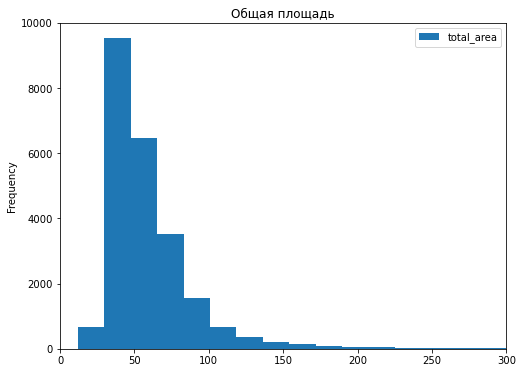

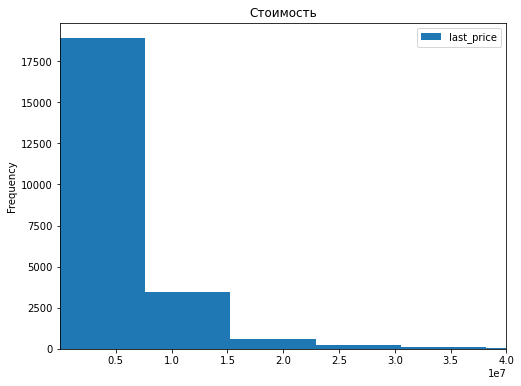

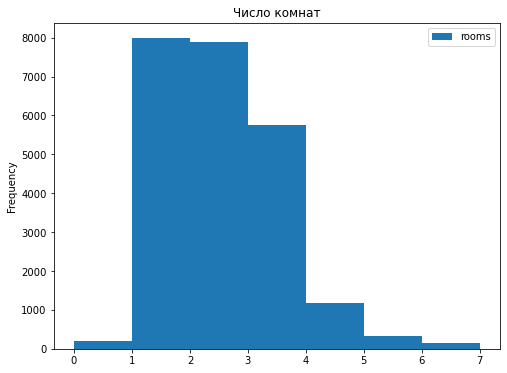

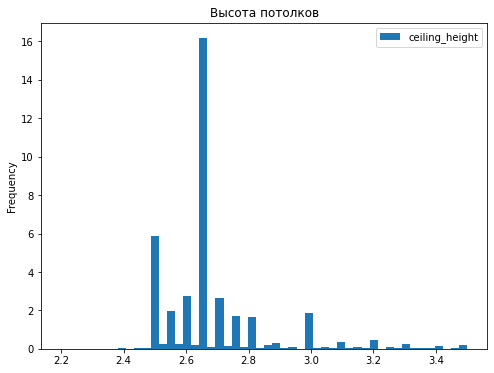

In [25]:
df.plot(y='total_area', kind='hist', bins=50, xlim=(0,300), figsize=(8,6), title='Общая площадь')
df.plot(y='last_price', kind='hist', bins=100, xlim=(12190,40000000.0), figsize=(8,6), title='Стоимость')
df.plot(y='rooms', kind='hist', bins=7, range=(0, 7), figsize=(8,6), title='Число комнат')
df.plot(y='ceiling_height', kind='hist', bins=50, range=(2.2, 3.5), density=True, figsize=(8,6), title='Высота потолков')
plt.show()

In [26]:
print("Площадь по медиане:", df.total_area.median())
print("Цена по медиане:", df.last_price.median())
print("Высота потолков по медиане:", df.ceiling_height.median())

Площадь по медиане: 52.0
Цена по медиане: 4630000.0
Высота потолков по медиане: 2.65


В данных по стоимости квартиры на момент снятия публикации заметила на гистограмме неравномерное распределение, нужно почистить данные от выбросов. В выборке очень мало квартир стоимостью больше 20 млн. и дешевле 500 тыс. Удалим данные значения:

<AxesSubplot:title={'center':'Стоимость'}, ylabel='Frequency'>

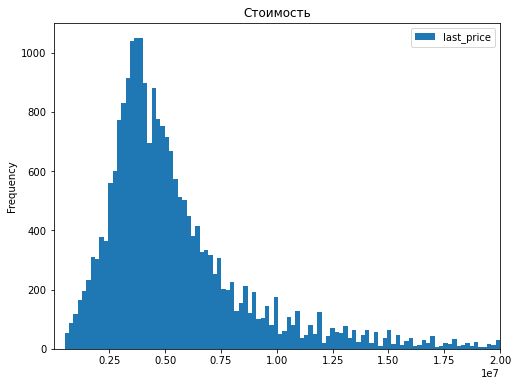

In [27]:
df.drop(df[df.last_price < 500000].index, inplace=True)
df.drop(df[df.last_price > 20000000].index, inplace=True)
df.plot(y='last_price', kind='hist', bins=100, xlim=(12190,20000000.0), figsize=(8,6), title='Стоимость')

In [28]:
print("Цена по медиане:", df.last_price.median())

Цена по медиане: 4550000.0


 **ВЫВОД**

Гистограмма по столбцу total_area выглядит правдоподобно - квартир площадью менее 25 кв.м почти нет, большая доля квартир имеет площадь 50-60 кв.м. Следом по частоте идут квартиры от 30 до 50 кв.м. После значения 100 кв.м число квартир стремительно убывает.


Медианная стоимость квартиры составляет 5.2 млн.
Наибольшее количество квартир имеют 2 или 3 комнаты, следом по частоте идут 4х комнатные, а потом уже однакомнатные.
Высота потолков составляет 2.65 метра.

**2.** Изучим время продажи квартиры с помощью гистограммы. Посчитаем среднее и медиану. 

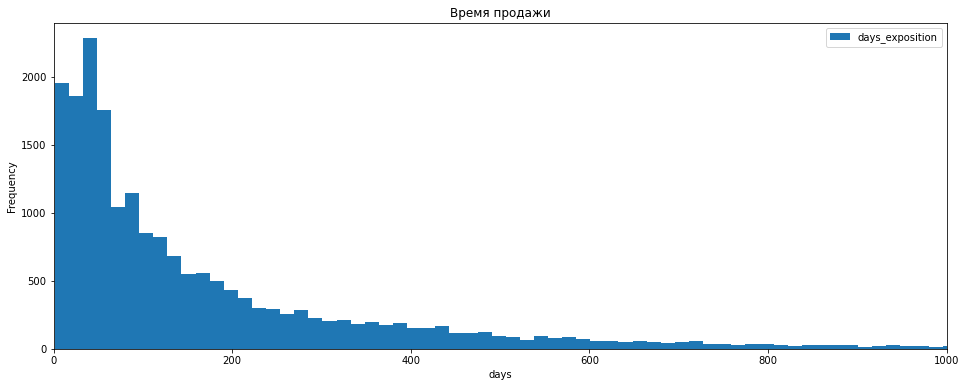

In [29]:
df.plot(y='days_exposition', kind='hist', bins=100, figsize=(16,6), xlim=(0,1000), title='Время продажи')
plt.xlabel("days")
plt.show()

In [30]:
df['days_exposition'].describe()

count    19829.000000
mean       177.710928
std        216.486828
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64


Медианное значение времени продажи квартиры составляет 97 дней, среднее - 180 , стандартное отклонение - 222, что говорит о наличии сильных выбросов. Продажа в 1580 дней является необыкновенно долгой, получается, что объект продавался 4 года.
Избавимся от аномальных значений. Отсеем продажи, совершенные до 7 дней и не более 1,5 лет.

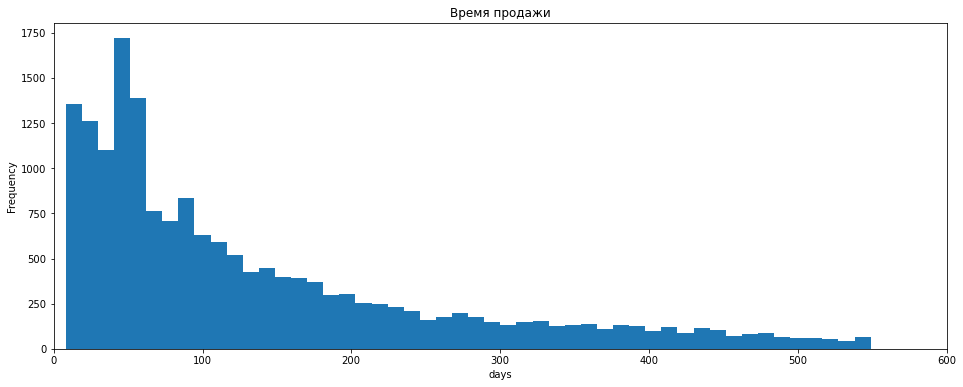

In [31]:
good_exposition_data = df.query('7 < days_exposition < 550')['days_exposition'].astype(int)
good_exposition_data.plot(y='days_exposition', kind='hist', bins=50, figsize=(16,6), xlim=(0,600), title='Время продажи')
plt.xlabel("days")
plt.show()

In [32]:
good_exposition_data.describe()

count    17620.000000
mean       137.331839
std        126.486920
min          8.000000
25%         45.000000
50%         90.000000
75%        192.000000
max        549.000000
Name: days_exposition, dtype: float64

 **ВЫВОД**

Исходя из полученных данных, можно сделать выводы, что самые частые продажи происходят в период от 45 до 60 дней. Если продажа произошла до 45 дней, то мы можем смело сказать, что продажа состоялась быстро. А вот если квартира на рынке задержалась более 200 дней, то такую продажу уже можно назвать долгой. При этом встречается недвижимость, которая продается более 1,5 лет.

**3.** Изучим зависит ли цена от площади, числа комнат, удалённости от центра. 

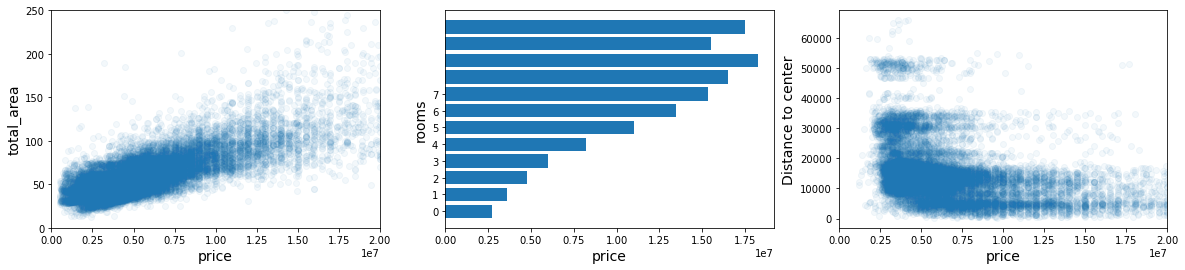

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))

ax1.scatter(df['last_price'], df['total_area'], alpha=0.05) # отношение площади к цене
ax1.set_xlim([0,20000000])
ax1.set_ylim([0,250])
ax1.set_ylabel('total_area', fontsize=14)
ax1.set_xlabel('price', fontsize=14)

rooms_price = df[['rooms', 'last_price']].groupby(['rooms']).median() # отношение к-ва комнат к цене
ax2.barh( rooms_price.index, rooms_price['last_price'] )
ax2.set_ylabel('rooms', fontsize=14)
ax2.set_xlabel('price', fontsize=14)
y_pos = np.arange(0,8)
ax2.set_yticks(y_pos)
ax2.set_yticklabels([str(i) for i in range(0,8)])

ax3.scatter(df['last_price'], df['city_сenters_nearest'], alpha=0.05) # отношение удаленности от центра к цене
ax3.set_xlim([0,20000000])
ax3.set_ylabel('Distance to center', fontsize=14)
ax3.set_xlabel('price', fontsize=14)

plt.show()

In [34]:
df[['last_price','total_area','city_сenters_nearest','rooms']].corr()

,last_price,total_area,city_сenters_nearest,rooms
last_price,1.000000,0.771420,-0.354818,0.514259
total_area,0.771420,1.000000,-0.195163,0.797320
city_сenters_nearest,-0.354818,-0.195163,1.000000,-0.142071
rooms,0.514259,0.797320,-0.142071,1.000000


 **ВЫВОД**

На графике зависимости стоимости квартиры от общей площади явно видна положительная корреляция.
На столбчатой диаграмме также заметна увеличивающаяся стоимость квартиры с увеличением числа комнат.

Видно, что стоимость квартиры больше зависит от общей площади, и в меньшей степени от количества комнат. Наибольшая корреляция между количеством комнат и площадью, т.к. увеличение к-ва комнат обязательно ведет за собой увеличение площади.


На графике зависимости стоимости квартиры от расстояния до центра города также видна зависимость - чем дальше квартира, тем дешевле она стоит.

**4.** Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

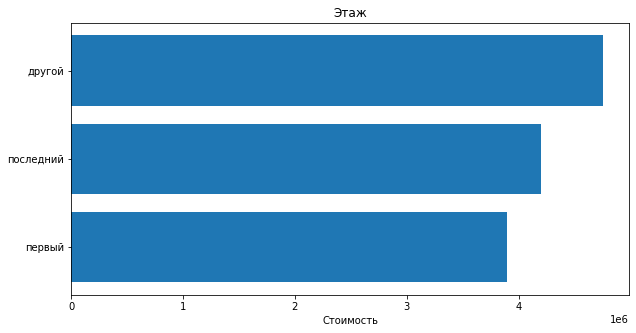

In [35]:
floor_price = df[['floor_group', 'last_price']].groupby(['floor_group']).median().sort_values('last_price')
plt.figure(figsize=(10,5))
plt.barh( floor_price.index, floor_price['last_price'] )
plt.title("Этаж")
plt.xlabel("Стоимость")
plt.show()

 **ВЫВОД**

Квартиры на первом этаже стоят дешевле всего. Квартиры на последнем этаже выше по стоимости, чем на первом. Самые дорогие квартиры находятся на других этажах.

**5.** Изучим зависимость от даты размещения: дня недели, месяца и года.

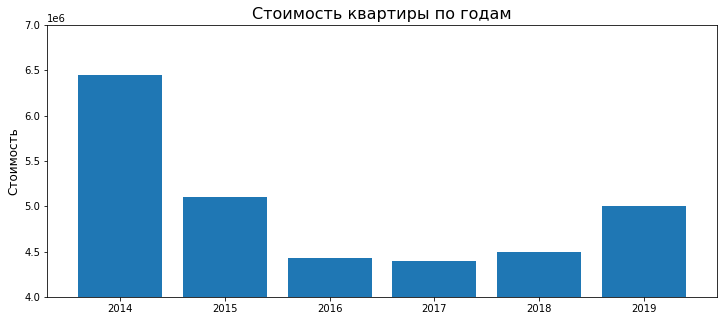

In [36]:
year_price = df[['year', 'last_price']].groupby(['year']).median().sort_index() #сгруппируем данные по году
plt.figure(figsize=(12,5))
plt.bar( year_price.index, year_price['last_price'])#для этих данных лучше подойдет столбчатая диаграмма
plt.title("Стоимость квартиры по годам", fontsize=16)
plt.ylabel("Стоимость", fontsize=12)
plt.ylim(4000000, 7000000)
plt.show()

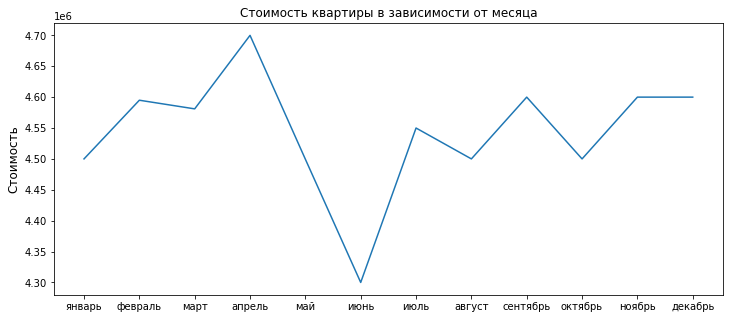

In [37]:
month_price = df[['month', 'last_price']].groupby(['month']).median().sort_index()#сделаем группировку по месяцу
month_price.index = ['январь', 'февраль', 'март', "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь"]
plt.figure(figsize=(12,5))
plt.plot( month_price.index, month_price['last_price']) #здесь для визуализации подойдет лучше график
plt.title("Стоимость квартиры в зависимости от месяца")
plt.ylabel("Стоимость", fontsize=12)
plt.show()

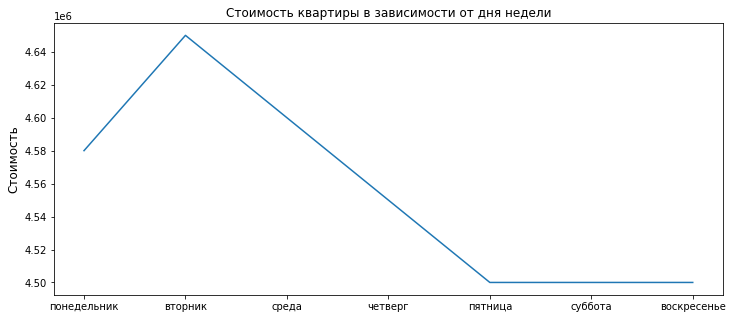

In [38]:
day_price = df[['weekday', 'last_price']].groupby(['weekday']).median().sort_index()#сделаем группировку по дням
day_price.index = ["понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"]
plt.figure(figsize=(12,5))
plt.plot( day_price.index, day_price['last_price'])#здесь для визуализации подойдет лучше график
plt.ylabel("Стоимость", fontsize=12)
plt.title("Стоимость квартиры в зависимости от дня недели")
plt.show()

 **ВЫВОД**

На основании данной выборки видно, что пик продаж недвижимости произошел в 2014 году, после чего стоимость начала падать аж до 2017 года. С 2018 года наблюдается небольшой рост.

Далее по графику видно, что спад цен на квартиры происходит с апреля по июнь, а также в декабре. При этом в июне наблюдаются самые низкие цены по отношению к другим месяцам. А самая высокая стоимость наблюдается в сентябре.

Стоимость квартир обычно выше во вторник  и четверг, при этом с четверга наблюдается нисходящий тренд. И получается, что стоимость квартир снижается на выходные дни. Воскресенье самый "дешевый" день.

**6.** Создадим топ-10 населённых пунктов с наибольшим числом объявлений. Далее посчитаем в них среднюю цену квадратного метра.

In [39]:
top_locals_10 = df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index.values.tolist()
df_top_10 = df.query('locality_name in @top_locals_10')
df_top_10.groupby('locality_name')['price_for_sq_meter'].mean().round().sort_values(ascending=False).to_frame('top_locals_10')

,top_locals_10
locality_name,
Санкт-Петербург,108635.0
Пушкин,101715.0
деревня Кудрово,92473.0
посёлок Парголово,90175.0
посёлок Мурино,85645.0
посёлок Шушары,78551.0
Колпино,75333.0
Гатчина,68757.0
Всеволожск,67161.0


 **ВЫВОД**

Самые дорогие квартиры располагаются, ожидаемо, в Санкт-Петербурге (107 тыс.), затем идет Пушкин.


Низкая стоимость квартир в Выборге - в два раза дешевле, чем в Санкт-Петербурге.


Во Всеволожске и Гатчине примерно одинаковые цены за кв.м., порядка 68 тыс.

**8.** Выделим квартиры в Санкт-Петербурге (locality_name). Необходимо выяснить, какая область входит в центр. Для этого создадим столбец с расстоянием до центра в километрах, округлив до целых значений. Затем посчитаем среднюю цену для каждого километра и построим график, с помощью которого определим, как цена зависит от удалённости по отношению к центру. 

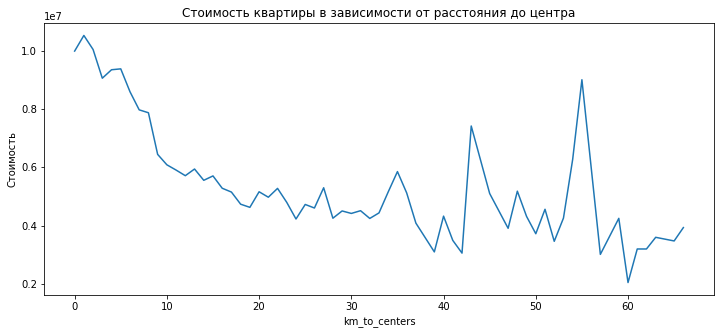

In [40]:
df['km_to_centers'] =( df['city_сenters_nearest']/1000 ).round()
plt.figure(figsize=(12,5))
df.groupby('km_to_centers')['last_price'].mean().plot()
plt.title("Стоимость квартиры в зависимости от расстояния до центра")
plt.ylabel("Стоимость")
plt.show()

 **ВЫВОД**

На графике видно, что цена сильно меняется на 8-9 километрах, следовательно это и есть граница центра города, поэтому там и самая высокая стоимость недвижимости. Также интересны 2 пика на 45 и 55 км, недвижимость там гораздо дороже. Можно преположить, что там находятся какие-то элитные постройки, возможно микрорайоны, которые являются своеобразными центрами для данной местности, или, например, коттеджные поселки.

**9.** Выделим сегмент квартир в центре и проанализируем эту территорию по следующим параметрам: площадь, цена, число комнат, высота потолков.

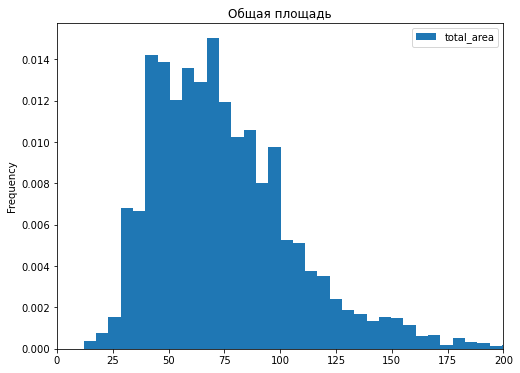

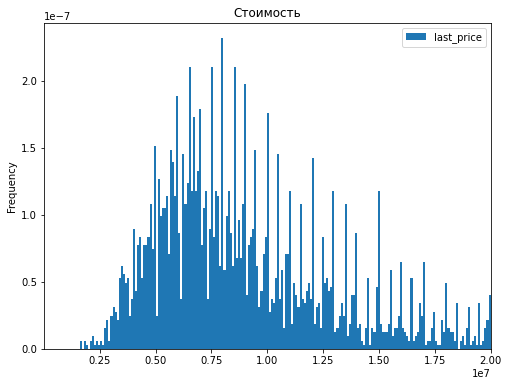

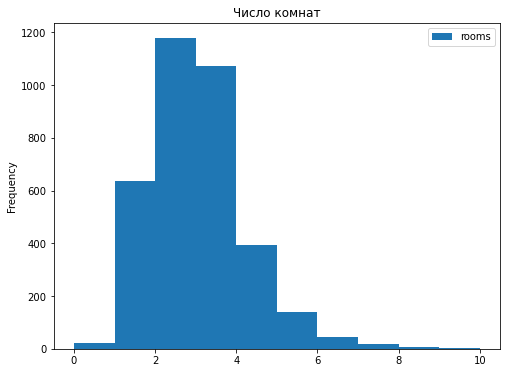

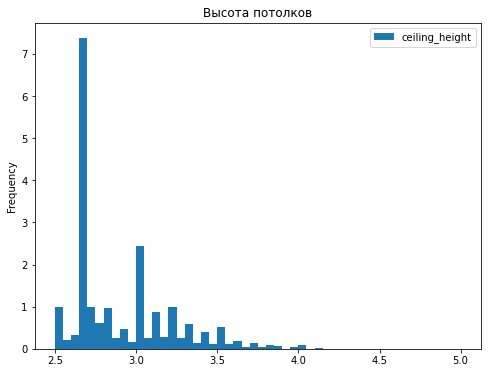

In [41]:
df_flats_in_center = df.query('km_to_centers <= 8 and locality_name == "Санкт-Петербург"')
df_flats_in_center.plot(y='total_area', kind='hist', density=True, bins=50, xlim=(0,200), figsize=(8,6), title='Общая площадь')
df_flats_in_center.plot(y='last_price', kind='hist', density=True, bins=200, xlim=(12190,20000000.0), figsize=(8,6), title='Стоимость')
df_flats_in_center.plot(y='rooms', kind='hist', bins=10, range=(0, 10), figsize=(8,6), title='Число комнат')
df_flats_in_center.plot(y='ceiling_height', kind='hist', bins=50, range=(2.5, 5), density=True, figsize=(8,6), title='Высота потолков')
plt.show()

In [42]:
df_flats_in_center.loc[:, ['last_price','total_area','ceiling_height','rooms']].median().to_frame('Медианное значение')

,Медианное значение
last_price,8150000.00
total_area,70.00
ceiling_height,2.75
rooms,2.00


 **ВЫВОД**

Квартиры в центре города могут "похвастать" большей площадью от 66 кв.м. Медиана по площади проходит на значении 75 квадратов.


В среднем они более дорогие, медианная стоимость составляет более 8 млн. В то время, как для квартир из всего датафрейма эта стоимость равняется 5,2 миллионам.


Квартиры в центре также чаще имеют от двух до 5 комнат, однокомнатных квартир гораздо меньше, чем в основной выборке.
Также у данных квартир выше потолки, в среднем 3 метра.

**10.** Выделим факторы влияющие на стоимость квартиры: число комнат, этаж, удалённость от центра и дата размещения объявления.

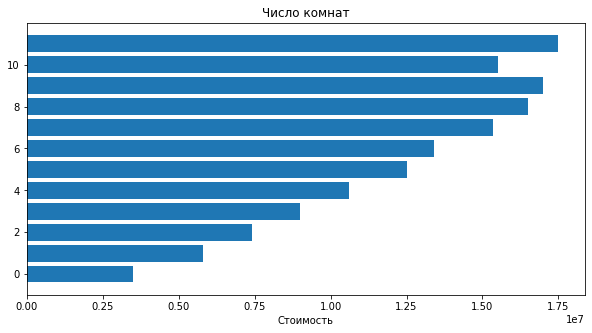

In [43]:
#ЧИСЛО КОМНАТ
rooms_price_center = df_flats_in_center[['rooms', 'last_price']].groupby(['rooms']).median()
plt.figure(figsize=(10,5))
plt.barh( rooms_price_center.index, rooms_price_center['last_price'] )
plt.title("Число комнат")
plt.xlabel("Стоимость")
plt.show()

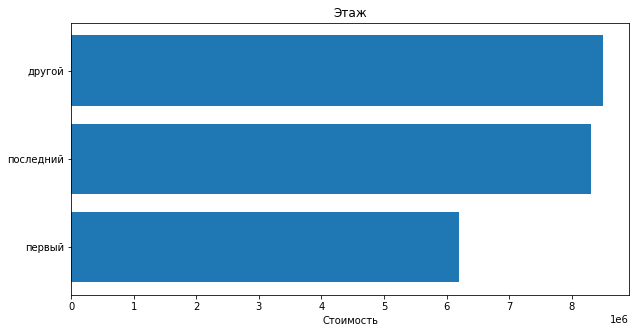

In [44]:
#ЭТАЖНОСТЬ
floor_price_center = ( df_flats_in_center[['floor_group', 'last_price']].groupby('floor_group').median()
                      .sort_values('last_price') )
plt.figure(figsize=(10,5))
plt.barh( floor_price_center.index, floor_price_center['last_price'] )
plt.title("Этаж")
plt.xlabel("Стоимость")
plt.show()

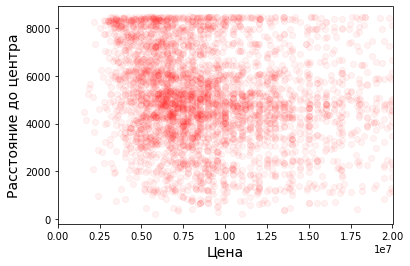

In [45]:
#УДАЛЕННОСТЬ ОТ ЦЕНТРА
plt.scatter(df_flats_in_center['last_price'], df_flats_in_center['city_сenters_nearest'], c='r', alpha=0.05)
plt.xlim(0,20000000)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Расстояние до центра', fontsize=14)
plt.show()

In [46]:
df_flats_in_center[['last_price', 'city_сenters_nearest']].corr()

,last_price,city_сenters_nearest
last_price,1.000000,-0.178237
city_сenters_nearest,-0.178237,1.000000


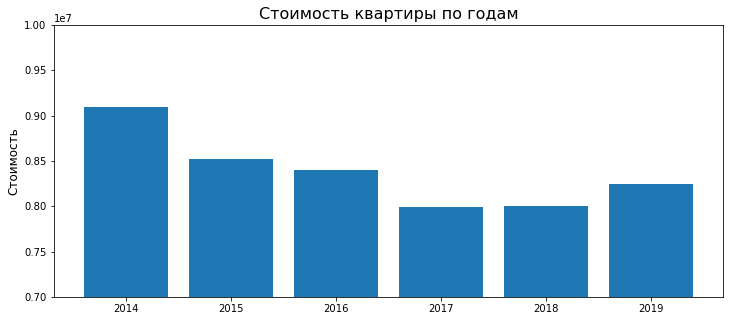

In [47]:
#ЗАВИСИМОСТЬ ОТ ГОДА
year_price_center = df_flats_in_center[['year', 'last_price']].groupby(['year']).median().sort_index()
plt.figure(figsize=(12,5))
plt.bar( year_price_center.index, year_price_center['last_price'])
plt.title("Стоимость квартиры по годам", fontsize=16)
plt.ylabel("Стоимость", fontsize=12)
plt.ylim(7000000,10000000)
plt.show()

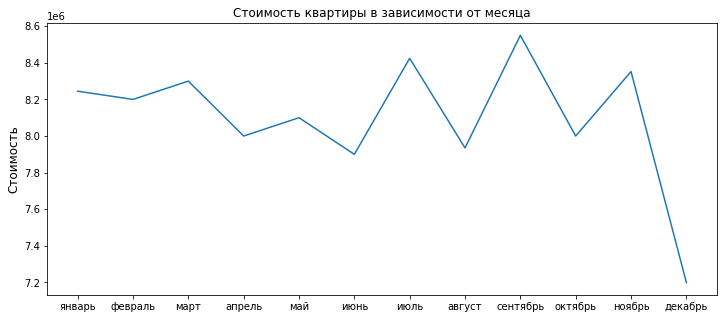

In [48]:
#ЗАВИСИМОСТЬ ОТ МЕСЯЦА
month_price_center = df_flats_in_center[['month', 'last_price']].groupby(['month']).median().sort_index()
month_price_center.index = ['январь', 'февраль', 'март', "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь"]
plt.figure(figsize=(12,5))
plt.plot( month_price_center.index, month_price_center['last_price'])
plt.title("Стоимость квартиры в зависимости от месяца")
plt.ylabel("Стоимость", fontsize=12)
plt.show()

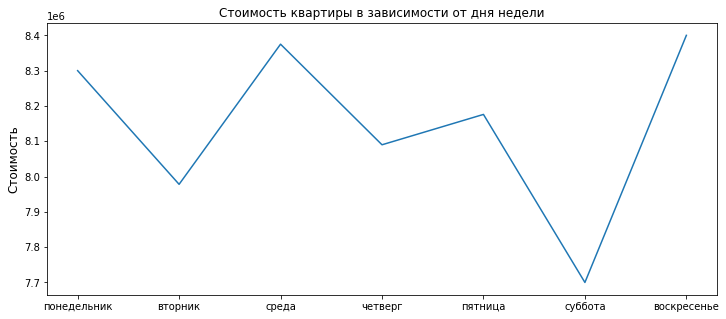

In [49]:
#ЗАВИСИМОСТЬ ОТ ДНЯ НЕДЕЛИ
day_price_center = df_flats_in_center[['weekday', 'last_price']].groupby(['weekday']).median().sort_index()
day_price_center.index = ["понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"]
plt.figure(figsize=(12,5))
plt.plot( day_price_center.index, day_price_center['last_price'])
plt.ylabel("Стоимость", fontsize=12)
plt.title("Стоимость квартиры в зависимости от дня недели")
plt.show()

 **ВЫВОД**

Стоимость квартиры также увеличивается в зависимости от количества комнат, как и во всем датасете.


Квартиры на первом этаже в центре Санкт-Петербурга значительно дешевле квартир на других этажах. Последние этажи также оцениваются дешевле, чем другие этажи.


А вот сильной зависимости от удаленности нет, квартиры могут стоить в центре по разному.


Диаграмма по годам идентичная всей выборке данных. С 2014 стоимость упала, а c 2017 начинает расти.


Для квартир в центре Санкт-Петербурга картина меняется по месяцам: наименьшая стоимость соответствует квартирам, продаваемым в декабре. В июне также присутсвует спад, но не такой большой, как в общей выборке. Наибольшая стоимость также наблюдается в сентябре.

Зависимость стоимости квартиры от дня недели также разительно отличается, дешевле всего квартиры выставляются на продажу по субботам, после чего наблюдается резкий тренд на увеличение цены с воскресенья и снова спад во вторник.

## Общий вывод

На основании проведенного исследовательского анализа объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет можно сделать следующие выводы:

**Общие параметры для недвижимости:**

1. В среднем квартира продается около трех месяцев;
2. Стоимость квартиры прямопропорционально зависит от площади и количества комнат;
3. На первом и последнем этаже квартиры стоят дешевле;
4. Стоимость квартир с 2014 года снизилась более чем на 2,5 млн. руб., а с 2019 года тренд сменился на повышение;
5. В июне квартиры продаются по самой низкой стоимости, а в апреле по самой высокой;
6. Во вторник и четверг недвижимость дороже в среднем на 200 тыс. в сравнении с воскресеньем;
7. Самые дорогие квартиры находятся в Санкт-Петербурге и Пушкине, а самые дешевые в Выборге

**Параметры для недвижимости в центре города:**

1. Квартиры в центре сильно отличаются в цене, они примерно в два раза дороже. Площадь квартир больше в среднем на 15 кв.м. Чаще встречаются многогомнатные квартиры, нежели однокомнатные. Более высокие потолки - 3 метра, для остальных квартир из датасета - 2,65; 
2. Стоимость квартир в центре также зависит от количества комнат, от этажа (на первом - дешевле), а от удаленности цена квартиры не зависит, в отличие от квартир из всей выборки;
3. По самой дешевой цене квартиры продаются в декабре, по самой дорогой - в сентябре;
4. Квартиры, размещаемые на продажу по четвергам продаются дешевле, чем в остальные дни. Пик стоимости приходится на воскресенье.